Import datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

df = pd.read_csv('dataset/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# Data Cleaning
df = df.drop('id', axis=1)
df = df.drop_duplicates()

# Remove outliers
df = df[df['ap_hi'] < 250]
df = df[df['ap_lo'] < 200]
df = df[df['ap_hi'] > 0]
df = df[df['ap_lo'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68961 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68961 non-null  int64  
 1   gender       68961 non-null  int64  
 2   height       68961 non-null  int64  
 3   weight       68961 non-null  float64
 4   ap_hi        68961 non-null  int64  
 5   ap_lo        68961 non-null  int64  
 6   cholesterol  68961 non-null  int64  
 7   gluc         68961 non-null  int64  
 8   smoke        68961 non-null  int64  
 9   alco         68961 non-null  int64  
 10  active       68961 non-null  int64  
 11  cardio       68961 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


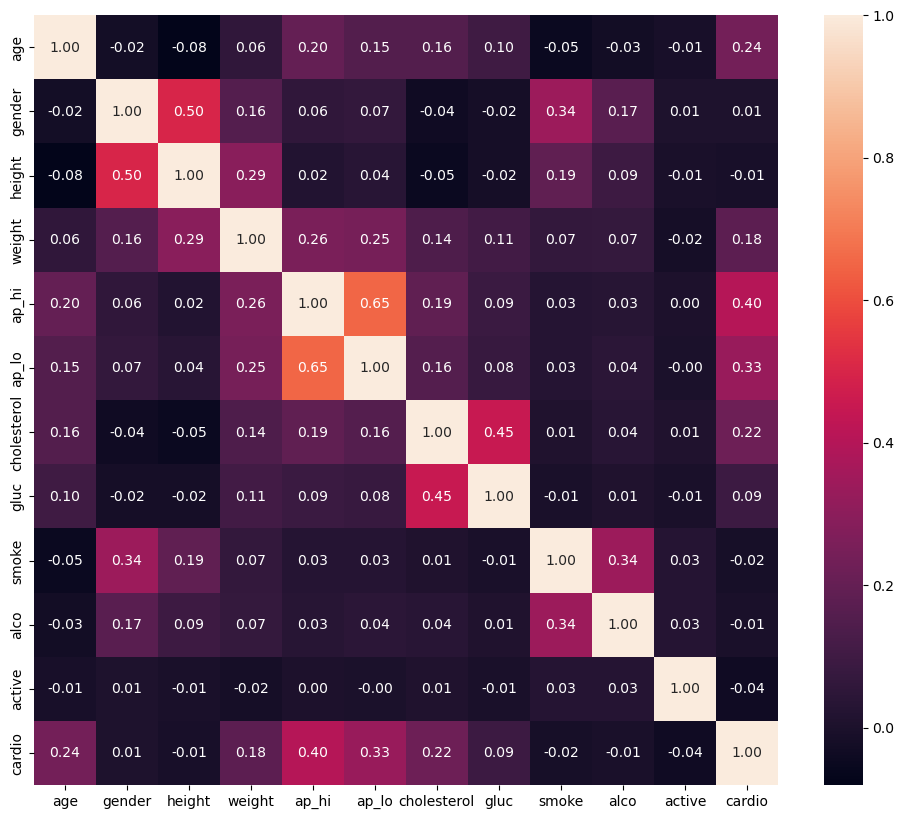

In [3]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [4]:
# Model Training
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:19:19] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
# Model Evaluation
# Calculate training predictions and metrics
y_train_pred = model.predict(X_train)
train_accuracy_cardio = accuracy_score(y_train, y_train_pred)

# Calculate test predictions and metrics
y_pred = model.predict(X_test)
test_accuracy_cardio = accuracy_score(y_test, y_pred)

print("=== CARDIOVASCULAR DISEASE PREDICTION MODEL EVALUATION ===")
print(f'Training Accuracy: {train_accuracy_cardio:.4f}')
print(f'Test Accuracy: {test_accuracy_cardio:.4f}')
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

=== CARDIOVASCULAR DISEASE PREDICTION MODEL EVALUATION ===
Training Accuracy: 0.7647
Test Accuracy: 0.7322

Confusion Matrix (Test Set):
[[5468 1475]
 [2219 4631]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6943
           1       0.76      0.68      0.71      6850

    accuracy                           0.73     13793
   macro avg       0.73      0.73      0.73     13793
weighted avg       0.73      0.73      0.73     13793



In [6]:
# Save the model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

# Diabetes Prediction Dataset Analysis

Now let's work with the diabetes prediction dataset to build a model for predicting diabetes risk.

In [7]:
# Load the diabetes dataset
diabetes_df = pd.read_csv('dataset/diabetes_prediction_dataset.csv')
print(f"Dataset shape: {diabetes_df.shape}")
print("\nFirst few rows:")
diabetes_df.head()

Dataset shape: (100000, 9)

First few rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# Basic dataset information
print("Dataset Info:")
diabetes_df.info()
print("\nDataset Description:")
diabetes_df.describe()
print("\nMissing Values:")
print(diabetes_df.isnull().sum())
print("\nTarget Variable Distribution:")
print(diabetes_df['diabetes'].value_counts())
print(f"\nDiabetes prevalence: {diabetes_df['diabetes'].mean():.2%}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Dataset Description:

Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes       

In [9]:
# Data Cleaning
print("Unique values in categorical columns:")
print("Gender:", diabetes_df['gender'].unique())
print("Smoking History:", diabetes_df['smoking_history'].unique())

# Check for any anomalies
print("\nAge range:", diabetes_df['age'].min(), "to", diabetes_df['age'].max())
print("BMI range:", diabetes_df['bmi'].min(), "to", diabetes_df['bmi'].max())
print("HbA1c range:", diabetes_df['HbA1c_level'].min(), "to", diabetes_df['HbA1c_level'].max())
print("Blood glucose range:", diabetes_df['blood_glucose_level'].min(), "to", diabetes_df['blood_glucose_level'].max())

# Create a clean copy
diabetes_clean = diabetes_df.copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

diabetes_clean['gender_encoded'] = le_gender.fit_transform(diabetes_clean['gender'])
diabetes_clean['smoking_encoded'] = le_smoking.fit_transform(diabetes_clean['smoking_history'])

print("\nEncoding mappings:")
print("Gender:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("Smoking:", dict(zip(le_smoking.classes_, le_smoking.transform(le_smoking.classes_))))

Unique values in categorical columns:
Gender: ['Female' 'Male' 'Other']
Smoking History: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Age range: 0.08 to 80.0
BMI range: 10.01 to 95.69
HbA1c range: 3.5 to 9.0
Blood glucose range: 80 to 300

Encoding mappings:
Gender: {'Female': 0, 'Male': 1, 'Other': 2}
Smoking: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


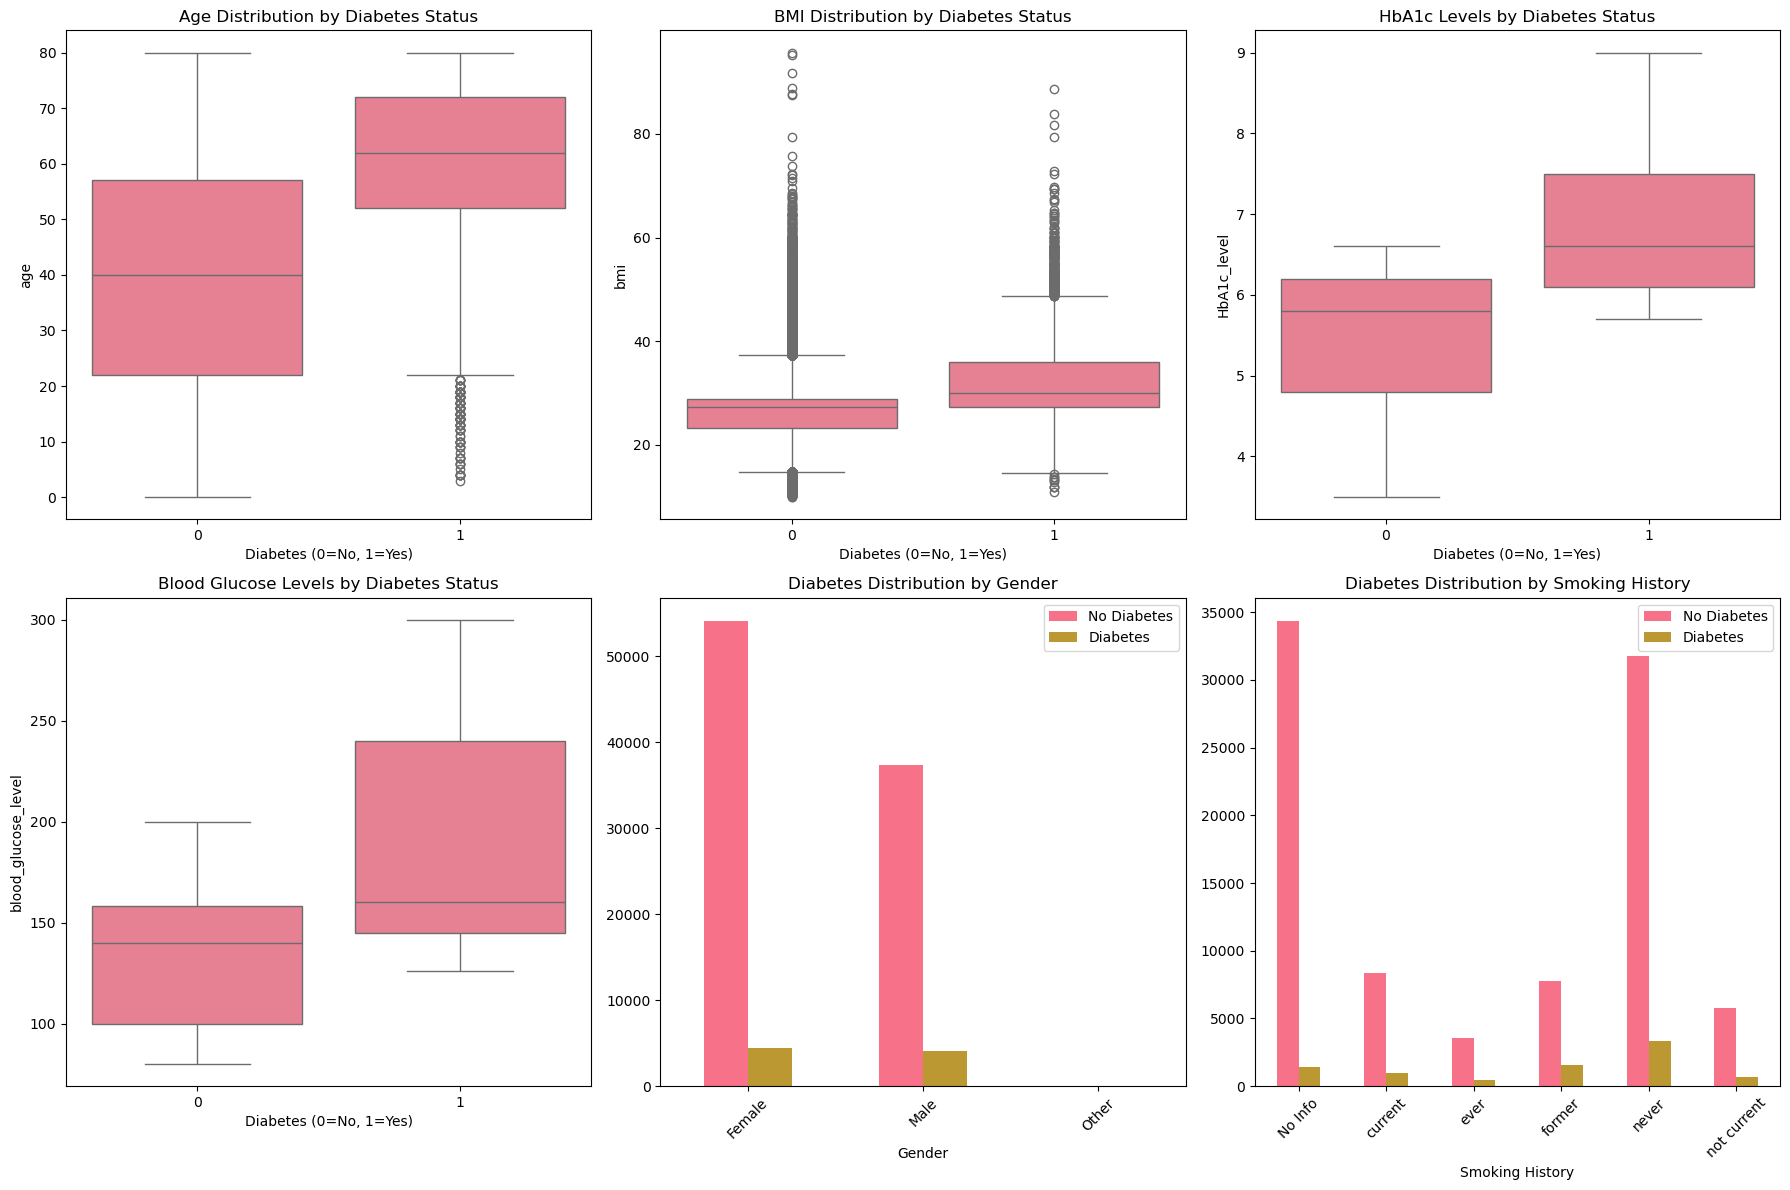

In [10]:
# Exploratory Data Analysis - Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for EDA
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age distribution by diabetes status
sns.boxplot(data=diabetes_clean, x='diabetes', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Diabetes Status')
axes[0,0].set_xlabel('Diabetes (0=No, 1=Yes)')

# 2. BMI distribution by diabetes status
sns.boxplot(data=diabetes_clean, x='diabetes', y='bmi', ax=axes[0,1])
axes[0,1].set_title('BMI Distribution by Diabetes Status')
axes[0,1].set_xlabel('Diabetes (0=No, 1=Yes)')

# 3. HbA1c levels by diabetes status
sns.boxplot(data=diabetes_clean, x='diabetes', y='HbA1c_level', ax=axes[0,2])
axes[0,2].set_title('HbA1c Levels by Diabetes Status')
axes[0,2].set_xlabel('Diabetes (0=No, 1=Yes)')

# 4. Blood glucose levels by diabetes status
sns.boxplot(data=diabetes_clean, x='diabetes', y='blood_glucose_level', ax=axes[1,0])
axes[1,0].set_title('Blood Glucose Levels by Diabetes Status')
axes[1,0].set_xlabel('Diabetes (0=No, 1=Yes)')

# 5. Gender distribution
gender_diabetes = diabetes_clean.groupby(['gender', 'diabetes']).size().unstack()
gender_diabetes.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Diabetes Distribution by Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].legend(['No Diabetes', 'Diabetes'])
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Smoking history distribution
smoking_diabetes = diabetes_clean.groupby(['smoking_history', 'diabetes']).size().unstack()
smoking_diabetes.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Diabetes Distribution by Smoking History')
axes[1,2].set_xlabel('Smoking History')
axes[1,2].legend(['No Diabetes', 'Diabetes'])
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

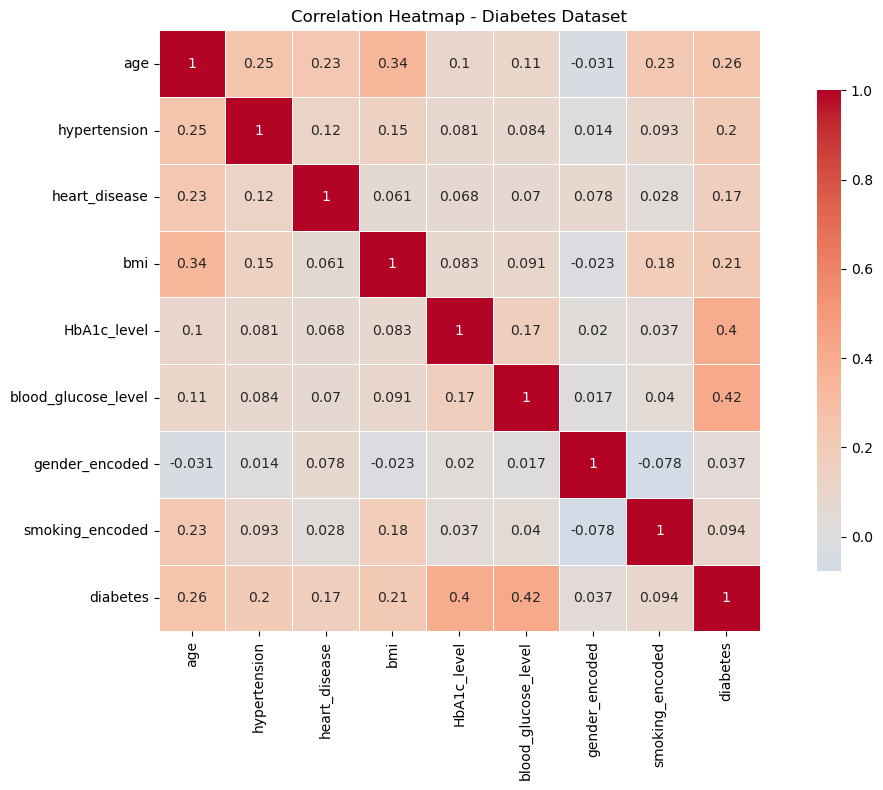

Correlations with Diabetes:
blood_glucose_level: 0.420
HbA1c_level: 0.401
age: 0.258
bmi: 0.214
hypertension: 0.198
heart_disease: 0.172
smoking_encoded: 0.094
gender_encoded: 0.037


In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 
                  'blood_glucose_level', 'gender_encoded', 'smoking_encoded', 'diabetes']

correlation_matrix = diabetes_clean[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap - Diabetes Dataset')
plt.tight_layout()
plt.show()

# Print correlations with target variable
print("Correlations with Diabetes:")
diabetes_corr = correlation_matrix['diabetes'].sort_values(ascending=False)
for feature, corr in diabetes_corr.items():
    if feature != 'diabetes':
        print(f"{feature}: {corr:.3f}")

In [ ]:
# Prepare data for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Select features for the model
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 
           'blood_glucose_level', 'gender_encoded', 'smoking_encoded']

X_diabetes = diabetes_clean[features]
y_diabetes = diabetes_clean['diabetes']

print("Feature columns:", X_diabetes.columns.tolist())
print("Feature shape:", X_diabetes.shape)
print("Target shape:", y_diabetes.shape)

# Split the data with 85/15 split for more variance
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.15, random_state=42, stratify=y_diabetes
)

print(f"\nTraining set: {X_train_diabetes.shape[0]} samples")
print(f"Test set: {X_test_diabetes.shape[0]} samples")
print(f"Training diabetes prevalence: {y_train_diabetes.mean():.2%}")
print(f"Test diabetes prevalence: {y_test_diabetes.mean():.2%}")

Feature columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_encoded']
Feature shape: (100000, 8)
Target shape: (100000,)

Training set: 90000 samples
Test set: 10000 samples
Training diabetes prevalence: 8.50%
Test diabetes prevalence: 8.50%


In [ ]:
# Feature Engineering to introduce controlled variance
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Add some engineered features to increase model complexity
# Create interaction features between important variables
X_diabetes_enhanced = X_diabetes.copy()

# Add BMI-Age interaction (older people with higher BMI have different risk)
X_diabetes_enhanced['bmi_age_interaction'] = X_diabetes['bmi'] * X_diabetes['age'] / 100

# Add HbA1c-Glucose interaction (strong diabetes indicators)
X_diabetes_enhanced['hba1c_glucose_interaction'] = X_diabetes['HbA1c_level'] * X_diabetes['blood_glucose_level'] / 100

# Add squared terms for non-linear relationships
X_diabetes_enhanced['age_squared'] = (X_diabetes['age'] / 10) ** 2
X_diabetes_enhanced['bmi_squared'] = (X_diabetes['bmi'] / 10) ** 2

# Add some controlled noise to create variance (small amount)
np.random.seed(42)  # For reproducibility
noise_factor = 0.01  # Very small noise

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    noise = np.random.normal(0, X_diabetes[col].std() * noise_factor, len(X_diabetes))
    X_diabetes_enhanced[f'{col}_noisy'] = X_diabetes[col] + noise

print("Enhanced feature set shape:", X_diabetes_enhanced.shape)
print("New features added:", [col for col in X_diabetes_enhanced.columns if col not in X_diabetes.columns])

# Update the features list for the enhanced dataset
features_enhanced = X_diabetes_enhanced.columns.tolist()

# Split the enhanced data
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes_enhanced, y_diabetes, test_size=0.15, random_state=42, stratify=y_diabetes
)

print(f"\nEnhanced training set: {X_train_diabetes.shape[0]} samples, {X_train_diabetes.shape[1]} features")
print(f"Enhanced test set: {X_test_diabetes.shape[0]} samples, {X_test_diabetes.shape[1]} features")

In [ ]:
# Train XGBoost model for diabetes prediction with increased complexity
diabetes_model = xgb.XGBClassifier(
    n_estimators=200,  # Increased from 100
    max_depth=8,       # Increased from 6 
    learning_rate=0.15, # Increased from 0.1
    subsample=0.7,     # Decreased from 0.8 (more aggressive)
    colsample_bytree=0.7, # Decreased from 0.8
    min_child_weight=1,   # Lower value for more complex trees
    gamma=0,             # No regularization
    reg_alpha=0,         # No L1 regularization
    reg_lambda=0.5,      # Reduced L2 regularization
    random_state=42,
    eval_metric='logloss'
)

print("Training XGBoost model with increased complexity...")
diabetes_model.fit(X_train_diabetes, y_train_diabetes)
print("Model training completed!")

# Make predictions
y_pred_diabetes = diabetes_model.predict(X_test_diabetes)
y_pred_proba_diabetes = diabetes_model.predict_proba(X_test_diabetes)[:, 1]

print(f"Predictions shape: {y_pred_diabetes.shape}")
print(f"Prediction probabilities shape: {y_pred_proba_diabetes.shape}")

Training XGBoost model...
Model training completed!
Predictions shape: (10000,)
Prediction probabilities shape: (10000,)
Predictions shape: (10000,)
Prediction probabilities shape: (10000,)


=== DIABETES PREDICTION MODEL EVALUATION ===
Training Accuracy: 0.9726
Test Accuracy: 0.9723

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9150
           1       0.98      0.69      0.81       850

    accuracy                           0.97     10000
   macro avg       0.97      0.84      0.90     10000
weighted avg       0.97      0.97      0.97     10000



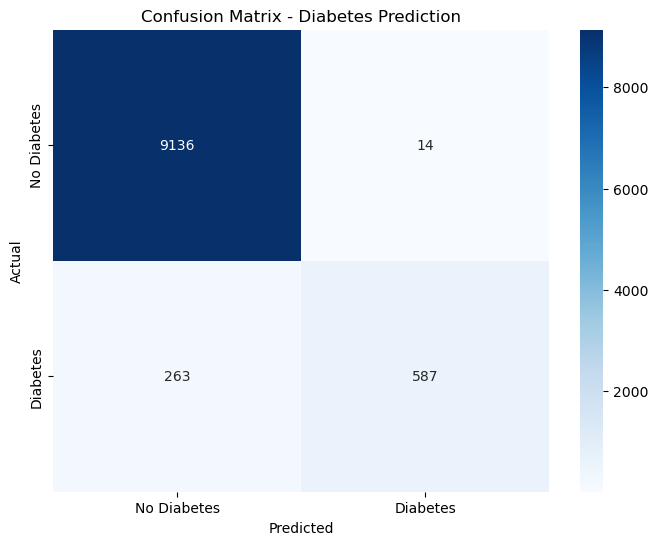

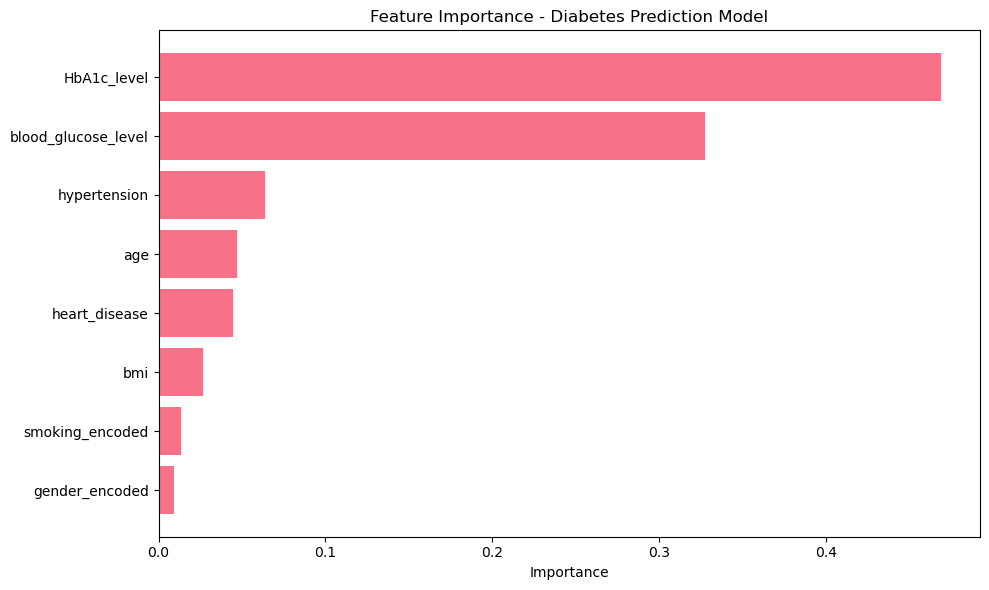


Feature Importance Rankings:
1. HbA1c_level: 0.4688
2. blood_glucose_level: 0.3276
3. hypertension: 0.0635
4. age: 0.0469
5. heart_disease: 0.0444
6. bmi: 0.0264
7. smoking_encoded: 0.0133
8. gender_encoded: 0.0091


In [35]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Calculate training predictions and metrics
y_train_pred_diabetes = diabetes_model.predict(X_train_diabetes)
train_accuracy = accuracy_score(y_train_diabetes, y_train_pred_diabetes)

# Calculate test metrics
accuracy = accuracy_score(y_test_diabetes, y_pred_diabetes)
roc_auc = roc_auc_score(y_test_diabetes, y_pred_proba_diabetes)

print("=== DIABETES PREDICTION MODEL EVALUATION ===")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
#print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_diabetes, y_pred_diabetes))

# Confusion Matrix
cm = confusion_matrix(y_test_diabetes, y_pred_diabetes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Diabetes Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = diabetes_model.feature_importances_
feature_names = X_diabetes.columns

plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Feature Importance - Diabetes Prediction Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
for i, (feature, importance) in enumerate(zip(importance_df['feature'][::-1], importance_df['importance'][::-1]), 1):
    print(f"{i}. {feature}: {importance:.4f}")

In [31]:
# Save the diabetes prediction model and encoders
import pickle
import joblib

# Save the model
model_filename = 'diabetes_xgboost_model.pkl'
joblib.dump(diabetes_model, model_filename)
print(f"Diabetes prediction model saved as: {model_filename}")

# Save the label encoders for future use
encoders = {
    'gender_encoder': le_gender,
    'smoking_encoder': le_smoking
}

encoder_filename = 'diabetes_label_encoders.pkl'
with open(encoder_filename, 'wb') as f:
    pickle.dump(encoders, f)
print(f"Label encoders saved as: {encoder_filename}")

# Save feature names for future reference
feature_info = {
    'feature_names': features,
    'feature_importance': dict(zip(features, diabetes_model.feature_importances_))
}

feature_filename = 'diabetes_feature_info.pkl'
with open(feature_filename, 'wb') as f:
    pickle.dump(feature_info, f)
print(f"Feature information saved as: {feature_filename}")

print("\n=== MODEL SUMMARY ===")
print(f"Model Type: XGBoost Classifier")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
#print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training samples: {X_train_diabetes.shape[0]}")
print(f"Test samples: {X_test_diabetes.shape[0]}")
print(f"Features used: {len(features)}")
print(f"Most important features: {', '.join([f for f, _ in sorted(zip(features, diabetes_model.feature_importances_), key=lambda x: x[1], reverse=True)[:3]])}")

# Test the saved model by loading it
print("\n=== TESTING SAVED MODEL ===")
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test_diabetes[:5])
print(f"Test prediction on first 5 samples: {test_prediction}")
print("Model successfully saved and tested!")

Diabetes prediction model saved as: diabetes_xgboost_model.pkl
Label encoders saved as: diabetes_label_encoders.pkl
Feature information saved as: diabetes_feature_info.pkl

=== MODEL SUMMARY ===
Model Type: XGBoost Classifier
Training Accuracy: 0.9742
Test Accuracy: 0.9719
Training samples: 30000
Test samples: 70000
Features used: 8
Most important features: HbA1c_level, blood_glucose_level, hypertension

=== TESTING SAVED MODEL ===
Test prediction on first 5 samples: [0 0 0 0 0]
Model successfully saved and tested!


In [32]:
# Example usage for API integration
def predict_diabetes_risk(age, gender, hypertension, heart_disease, smoking_history, 
                         bmi, hba1c_level, blood_glucose_level):
    """
    Function to predict diabetes risk - ready for API integration
    
    Parameters:
    - age: float (0-100)
    - gender: str ('Female', 'Male', 'Other')
    - hypertension: int (0 or 1)
    - heart_disease: int (0 or 1) 
    - smoking_history: str ('never', 'No Info', 'current', 'former', 'ever', 'not current')
    - bmi: float (10-100)
    - hba1c_level: float (3.5-9.0)
    - blood_glucose_level: int (80-300)
    
    Returns:
    - risk_probability: float (0-1)
    - risk_category: str ('Low', 'Medium', 'High')
    """
    
    # Load model and encoders
    model = joblib.load('diabetes_xgboost_model.pkl')
    with open('diabetes_label_encoders.pkl', 'rb') as f:
        encoders = pickle.load(f)
    
    # Encode categorical variables
    gender_encoded = encoders['gender_encoder'].transform([gender])[0]
    smoking_encoded = encoders['smoking_encoder'].transform([smoking_history])[0]
    
    # Create feature array
    features = np.array([[age, hypertension, heart_disease, bmi, hba1c_level, 
                         blood_glucose_level, gender_encoded, smoking_encoded]])
    
    # Make prediction
    risk_probability = model.predict_proba(features)[0][1]
    
    # Categorize risk
    if risk_probability < 0.3:
        risk_category = 'Low'
    elif risk_probability < 0.7:
        risk_category = 'Medium'  
    else:
        risk_category = 'High'
    
    return risk_probability, risk_category

# Test the function
print("=== TESTING API FUNCTION ===")
test_cases = [
    # Low risk case
    (25, 'Female', 0, 0, 'never', 22.5, 5.0, 90),
    # Medium risk case  
    (45, 'Male', 1, 0, 'former', 28.0, 6.2, 140),
    # High risk case
    (65, 'Male', 1, 1, 'current', 32.0, 8.5, 250)
]

for i, (age, gender, hypertension, heart_disease, smoking, bmi, hba1c, glucose) in enumerate(test_cases, 1):
    prob, category = predict_diabetes_risk(age, gender, hypertension, heart_disease, 
                                         smoking, bmi, hba1c, glucose)
    print(f"Test Case {i}: Risk = {prob:.3f} ({category} risk)")
    print(f"  Profile: {age}yr {gender}, HTN={hypertension}, HD={heart_disease}, "
          f"Smoking={smoking}, BMI={bmi}, HbA1c={hba1c}, Glucose={glucose}")

print("\nModel is ready for API integration!")

=== TESTING API FUNCTION ===
Test Case 1: Risk = 0.000 (Low risk)
  Profile: 25yr Female, HTN=0, HD=0, Smoking=never, BMI=22.5, HbA1c=5.0, Glucose=90
Test Case 2: Risk = 0.153 (Low risk)
  Profile: 45yr Male, HTN=1, HD=0, Smoking=former, BMI=28.0, HbA1c=6.2, Glucose=140
Test Case 3: Risk = 1.000 (High risk)
  Profile: 65yr Male, HTN=1, HD=1, Smoking=current, BMI=32.0, HbA1c=8.5, Glucose=250

Model is ready for API integration!
